In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
interview = pd.read_json('./export_20240314/interview.jsonl', lines=True)
letters = pd.read_json('./export_20240314/leserbrief.jsonl', lines=True)
comments = pd.read_json('./export_20240314/meinung.jsonl', lines=True)

In [6]:
data = [interview, letters, comments]

# Extract data from list values in "labels" column
for i in range(len(data)):
    data[i]['labels'] = data[i]['labels'].apply(lambda x: x[0])
    
interview = data[0]
letters = data[1]
comments = data[2]

In [10]:
interview['labels'] = interview['labels'].apply(lambda x: "interview" if x == "RELEVANT" else x)
letters['labels'] = letters['labels'].apply(lambda x: "letter" if x == "RELEVANT" else x)
comments['labels'] = comments['labels'].apply(lambda x: "comment" if x == "RELEVANT" else x)

In [33]:
interview

,labels,text,unikey,recname,recstamp
0,interview,Zwei Jubiläen als Stresstest\n\ninterviewLento...,2.099312e+18,KRONE_2023123115001241154,2023-12-31T00:00:00Z
1,interview,"Leserbrief: ""Klimawandel oder Klimakrise""\n\n ...",6.326778e+18,KRONE_2023123115001241348,2023-12-31T00:00:00Z
2,interview,„Kaum eine Woche unter 80 Arbeitsstunden!“\n\n...,1.018152e+19,KRONE_2023123115001241763,2023-12-31T00:00:00Z
3,interview,„Check this out! This is paradise!“\n\nDer US-...,2.242322e+18,KRONE_2023123115001241958,2023-12-31T00:00:00Z
4,interview,„Es War eine extreme hochschaubahn“\n\n Der ...,1.969262e+18,KRONE_2023123115001240272,2023-12-31T00:00:00Z
...,...,...,...,...,...
165209,NONRELEVANT,Leitartikel von Josef Urschitz ...\n\n Leita...,5.762835e+18,PRESSE_2023072912051938357710005,2023-07-29T00:00:00Z
165210,NONRELEVANT,Die OMV schwimmt bald in Gas\n\n Energie. De...,9.671982e+18,PRESSE_2023072912051938357710004,2023-07-29T00:00:00Z
165211,NONRELEVANT,Feuilleton...\n\n Feuilleton\n\n\n Figaros...,7.641877e+18,PRESSE_2023072912051938357710003,2023-07-29T00:00:00Z
165212,NONRELEVANT,Radio & TV...\n\n Radio & TV\n\n\n S. 8\n\...,2.516675e+18,PRESSE_2023072912051938357710002,2023-07-29T00:00:00Z


In [62]:
data = pd.concat([interview, letters, comments], ignore_index=True).drop_duplicates(subset=['labels', 'text'])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182918 entries, 0 to 505641
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   labels    182918 non-null  object 
 1   text      182918 non-null  object 
 2   unikey    182918 non-null  float64
 3   recname   182918 non-null  object 
 4   recstamp  182918 non-null  object 
dtypes: float64(1), object(4)
memory usage: 8.4+ MB


In [70]:
duplicates = data[data.duplicated(subset='text', keep=False)][['labels', 'text']].groupby('text')['labels'].apply(list).reset_index()
duplicates['len'] = duplicates['labels'].apply(lambda x: len(x))
duplicates

,text,labels,len
0,"""Immobilien-Kartenhaus""\n\nWenn Otto Normalver...","[letter, NONRELEVANT]",2
1,"""Klimakleber""\n\nDie jüngsten Wetterkapriolen ...","[letter, NONRELEVANT]",2
2,"""Schonungslose Finanz-Bilanz""\n\nWer das verga...","[letter, NONRELEVANT]",2
3,"""Wiener Zeitung"" als Start-up ohne Mehrwert\n\...","[NONRELEVANT, comment]",2
4,"""Österreich, die Friedensmacht""\n\nAuf der Wel...","[letter, NONRELEVANT]",2
...,...,...,...
6330,„Österreich ist zu teuer geworden“\n\nIntervie...,"[interview, NONRELEVANT]",2
6331,„Österreichs Kultur war anfangs ein Schock“\n\...,"[interview, NONRELEVANT]",2
6332,„Österreichs Position ist dieses Mal extrem“\n...,"[interview, NONRELEVANT]",2
6333,„Über Aufnahmetests fürs Medizin-Studium muss ...,"[interview, NONRELEVANT]",2


In [73]:
duplicates[duplicates['len'] == 4]

,text,labels,len


In [75]:
tripple_duplicates = duplicates[duplicates['len'] == 3]
tripple_duplicates

,text,labels,len
15,"2024!\n\n Nein, ich werde NICHT von meinen W...","[interview, NONRELEVANT, comment]",3
26,"A O H 1 9 9 6 !!!\n\n ???\n\n\n Na, die Pi...","[interview, NONRELEVANT, comment]",3
28,A-l-a-b-a!\n\n David Alaba.\n\n\n Gegenwär...,"[interview, NONRELEVANT, comment]",3
38,Abstruse Groteske!\n\n Absurder geht’s schwe...,"[interview, NONRELEVANT, comment]",3
96,"BLUTGELD, Herr Selmayr Martin?\n\n Selten ha...","[interview, NONRELEVANT, comment]",3
...,...,...,...
5200,Weihnachten aus meiner Sicht!\n\n Ich hab zw...,"[interview, NONRELEVANT, comment]",3
5309,"Zum Anspeiben!\n\n So sagt man, wenn einem n...","[interview, NONRELEVANT, comment]",3
5321,an eine Staatsanwältin!\n\n Nicht an irgende...,"[interview, NONRELEVANT, comment]",3
5813,"„Ich dachte, ich spinne!“\n\n So kürzlich ei...","[interview, NONRELEVANT, comment]",3


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182918 entries, 0 to 505641
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   labels    182918 non-null  object 
 1   text      182918 non-null  object 
 2   unikey    182918 non-null  float64
 3   recname   182918 non-null  object 
 4   recstamp  182918 non-null  object 
dtypes: float64(1), object(4)
memory usage: 8.4+ MB


In [77]:
data = data[~data['text'].isin(tripple_duplicates['text'])]


In [80]:
double_duplicates = duplicates[duplicates['len']==2]
double_duplicates

,text,labels,len
0,"""Immobilien-Kartenhaus""\n\nWenn Otto Normalver...","[letter, NONRELEVANT]",2
1,"""Klimakleber""\n\nDie jüngsten Wetterkapriolen ...","[letter, NONRELEVANT]",2
2,"""Schonungslose Finanz-Bilanz""\n\nWer das verga...","[letter, NONRELEVANT]",2
3,"""Wiener Zeitung"" als Start-up ohne Mehrwert\n\...","[NONRELEVANT, comment]",2
4,"""Österreich, die Friedensmacht""\n\nAuf der Wel...","[letter, NONRELEVANT]",2
...,...,...,...
6329,"„Österreich ist entspannter“\n\nLachen, weinen...","[interview, NONRELEVANT]",2
6330,„Österreich ist zu teuer geworden“\n\nIntervie...,"[interview, NONRELEVANT]",2
6331,„Österreichs Kultur war anfangs ein Schock“\n\...,"[interview, NONRELEVANT]",2
6332,„Österreichs Position ist dieses Mal extrem“\n...,"[interview, NONRELEVANT]",2


In [81]:
double_duplicates['NONRELEVANT_isin'] = double_duplicates['labels'].apply(lambda x: True if "NONRELEVANT" in x else False)

/var/folders/8c/_sr2kqv935l1jvwxjljct8680000gn/T/ipykernel_15747/145104926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  double_duplicates['NONRELEVANT_isin'] = double_duplicates['labels'].apply(lambda x: True if "NONRELEVANT" in x else False)


In [83]:
double_duplicates['NONRELEVANT_isin'].value_counts()

NONRELEVANT_isin
True    6239
Name: count, dtype: int64

Non relevant is in every row so we only take the valid label

In [90]:
# Identify rows in data that match conditions in double_duplicates
rows_to_remove = double_duplicates.apply(lambda row: (row['text'] in data['text']) and ('non-relevant' in row['label']), axis=1)

# # Remove identified rows from data
# filtered_data = data[~rows_to_remove]

# # Display the filtered DataFrame
# print(filtered_data)


In [98]:
to_delete = data['text'].isin(double_duplicates[double_duplicates['labels'].apply(lambda x: 'NONRELEVANT' in x)]['text'])

In [118]:
to_delete = data[data['text'].isin(double_duplicates['text'])][data['labels']=='NONRELEVANT']
to_delete_indicies = to_delete.index

/var/folders/8c/_sr2kqv935l1jvwxjljct8680000gn/T/ipykernel_15747/2356065782.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  to_delete = data[data['text'].isin(double_duplicates['text'])][data['labels']=='NONRELEVANT']


In [121]:
data = data.drop(to_delete_indicies)

In [123]:
data[data.duplicated(subset='text')]

,labels,text,unikey,recname,recstamp


<Axes: ylabel='count'>

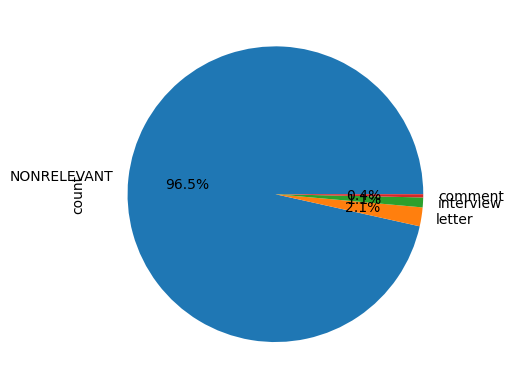

In [125]:
data['labels'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [140]:
from preprocess import PreprocessAPA
preprocessor = PreprocessAPA(".",".",".")

In [143]:
df = data.copy()
words = ['leserpost', 'leserbrief']

def word_remover(text):
    text = text.lower()
    for word in words:
        text = text.replace(word,'')
    return text

df['text'] = df['text'].apply(word_remover)

In [144]:
df = preprocessor.remove_punctuation(df, 'text')
df = preprocessor.remove_whitespace(df, 'text')
df = preprocessor.ml_text_preproc(df, 'text', 'labels', full_preproc=False)

In [146]:
df = df[['text', 'label_ids', 'labels']]
df[['labels', 'label_ids']].drop_duplicates()

,labels,label_ids
0,interview,0
911,NONRELEVANT,1
165228,letter,2
336408,comment,3


In [147]:
from ML_models import ML_Models

In [148]:
model = ML_Models()

In [150]:
model_performance = model.run(df)

Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.40      0.52       395
           1       0.97      1.00      0.99     33957
           2       0.80      0.27      0.40       726
           3       0.00      0.00      0.00       114

    accuracy                           0.97     35192
   macro avg       0.62      0.42      0.48     35192
weighted avg       0.97      0.97      0.97     35192


